In [22]:
df = pd.read_csv("branch_topics_ending.csv", sep=",")

# Step 1: Explode topic strings
df["topics"] = df["topics"].str.split(" - ")
df = df.explode("topics")
df["topics"] = df["topics"].str.strip()

In [23]:
df

,branch_id,topics,ending
0,0,Trump support,disagreement
0,0,Media bypass,disagreement
0,0,Popularity assessment,disagreement
1,1,Media bias,inconclusive
1,1,Trump's communication,inconclusive
...,...,...,...
4625,4625,criticism of Trump,inconclusive
4625,4625,comparison to Joe Rogan interview,inconclusive
4626,4626,dislike count,inconclusive
4626,4626,YouTube extension,inconclusive


In [24]:
# Step 2: Get unique topic phrases

In [25]:
# Step 3: Embed them


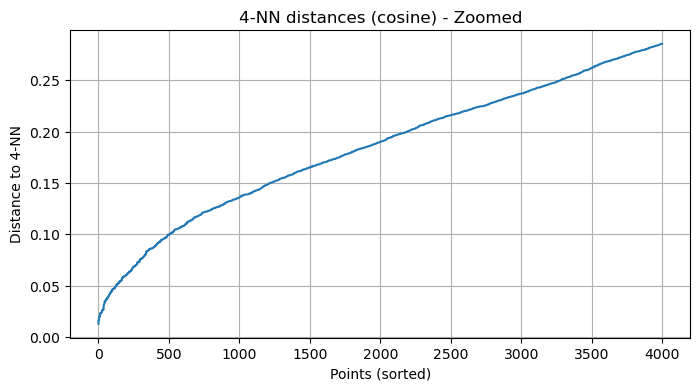

In [64]:
# Step 4a: Find EPS value for DBSCAN

# embeddings: your list of topic sentence embeddings
min_samples = 4  # same as you'll use in DBSCAN

neighbors = NearestNeighbors(n_neighbors=min_samples, metric='cosine')
neighbors_fit = neighbors.fit(embeddings)
distances, indices = neighbors_fit.kneighbors(embeddings)

# Get distance to the k-th nearest neighbor for each point
k_distances = np.sort(distances[:, -1])

# Plot the sorted k-distances
plt.figure(figsize=(8, 4))
plt.plot(k_distances[:4000])
plt.title(f"{min_samples}-NN distances (cosine) - Zoomed")
plt.xlabel("Points (sorted)")
plt.ylabel("Distance to {}-NN".format(min_samples))
plt.grid(True)
plt.show()

In [65]:
# Step 4b: Cluster


In [66]:
# Step 5: Map each original topic to macro cluster
topic_to_cluster = {
    topic: f"macro_topic_{label}" if label != -1 else "noise"
    for topic, label in zip(unique_topics, labels)
}
df["macro_topic"] = df["topics"].map(topic_to_cluster)

In [67]:
df

,branch_id,topics,ending,macro_topic
0,0,Trump support,disagreement,macro_topic_0
0,0,Media bypass,disagreement,noise
0,0,Popularity assessment,disagreement,noise
1,1,Media bias,inconclusive,macro_topic_1
1,1,Trump's communication,inconclusive,noise
...,...,...,...,...
4625,4625,criticism of Trump,inconclusive,macro_topic_19
4625,4625,comparison to Joe Rogan interview,inconclusive,macro_topic_7
4626,4626,dislike count,inconclusive,noise
4626,4626,YouTube extension,inconclusive,noise


In [90]:
# Print topics by size
Counter(df["macro_topic"])

Counter({'noise': 12253,
         'macro_topic_1': 459,
         'macro_topic_0': 190,
         'macro_topic_4': 137,
         'macro_topic_3': 123,
         'macro_topic_18': 107,
         'macro_topic_20': 96,
         'macro_topic_19': 95,
         'macro_topic_26': 95,
         'macro_topic_72': 74,
         'macro_topic_2': 70,
         'macro_topic_24': 57,
         'macro_topic_5': 51,
         'macro_topic_16': 50,
         'macro_topic_76': 50,
         'macro_topic_116': 49,
         'macro_topic_75': 44,
         'macro_topic_14': 43,
         'macro_topic_58': 42,
         'macro_topic_77': 42,
         'macro_topic_69': 39,
         'macro_topic_29': 38,
         'macro_topic_8': 36,
         'macro_topic_81': 36,
         'macro_topic_37': 35,
         'macro_topic_85': 35,
         'macro_topic_106': 30,
         'macro_topic_91': 29,
         'macro_topic_21': 28,
         'macro_topic_92': 25,
         'macro_topic_79': 24,
         'macro_topic_22': 23,
         'macr

In [124]:
df

,branch_id,topics,ending,macro_topic,macro_topic_name
0,0,Trump support,disagreement,macro_topic_0,Trump
0,0,Media bypass,disagreement,noise,Other
0,0,Popularity assessment,disagreement,noise,Other
1,1,Media bias,inconclusive,macro_topic_1,Media Bias
1,1,Trump's communication,inconclusive,noise,Other
...,...,...,...,...,...
4625,4625,criticism of Trump,inconclusive,macro_topic_19,Trump
4625,4625,comparison to Joe Rogan interview,inconclusive,macro_topic_7,Other
4626,4626,dislike count,inconclusive,noise,Other
4626,4626,YouTube extension,inconclusive,noise,Other


In [125]:
selected_df = df[["branch_id", "ending", "macro_topic_name"]]

In [126]:
selected_df

,branch_id,ending,macro_topic_name
0,0,disagreement,Trump
0,0,disagreement,Other
0,0,disagreement,Other
1,1,inconclusive,Media Bias
1,1,inconclusive,Other
...,...,...,...
4625,4625,inconclusive,Trump
4625,4625,inconclusive,Other
4626,4626,inconclusive,Other
4626,4626,inconclusive,Other


In [127]:
selected_df.to_csv("branch_topcis_ending_2.csv", index=False)

In [2]:
df = pd.read_csv("branch_topcis_ending_2.csv", sep=",")

In [3]:
df

,branch_id,ending,macro_topic_name
0,0,disagreement,Trump
1,0,disagreement,Other
2,0,disagreement,Other
3,1,inconclusive,Media Bias
4,1,inconclusive,Other
...,...,...,...
15452,4625,inconclusive,Trump
15453,4625,inconclusive,Other
15454,4626,inconclusive,Other
15455,4626,inconclusive,Other


In [13]:
df_toxicities = pd.read_csv("branch_toxicities.csv", sep=",")

toxicities_map = {
    row[1]: row[2]
    for row in df_toxicities.itertuples()
}

In [14]:
toxicities_map

{0: 0.0323,
 1: 0.06,
 2: 0.3404,
 3: 0.1634,
 4: 0.2051,
 5: 0.1195,
 6: 0.2339,
 7: 0.0737,
 8: 0.1691,
 9: 0.0473,
 10: 0.1675,
 11: 0.1935,
 12: 0.1381,
 13: 0.2252,
 14: 0.0319,
 15: 0.0522,
 16: 0.2163,
 17: 0.1124,
 18: 0.2507,
 19: 0.0788,
 20: 0.1538,
 21: 0.0902,
 22: 0.0781,
 23: 0.0891,
 24: 0.1612,
 25: 0.182,
 26: 0.1978,
 27: 0.2112,
 28: 0.1696,
 29: 0.1869,
 30: 0.1463,
 31: 0.1734,
 32: 0.1821,
 33: 0.1566,
 34: 0.2354,
 35: 0.1698,
 36: 0.2423,
 37: 0.1783,
 38: 0.1461,
 39: 0.1755,
 40: 0.1859,
 41: 0.0362,
 42: 0.1788,
 43: 0.0482,
 44: 0.1784,
 45: 0.0925,
 46: 0.0939,
 47: 0.207,
 48: 0.2364,
 49: 0.1853,
 50: 0.147,
 51: 0.1805,
 52: 0.1451,
 53: 0.0663,
 54: 0.2135,
 55: 0.1271,
 56: 0.0937,
 57: 0.1478,
 58: 0.1312,
 59: 0.1598,
 60: 0.1434,
 61: 0.1339,
 62: 0.1441,
 63: 0.1539,
 64: 0.3103,
 65: 0.2304,
 66: 0.0453,
 67: 0.0579,
 68: 0.2343,
 69: 0.1607,
 70: 0.19,
 71: 0.252,
 72: 0.1219,
 73: 0.199,
 74: 0.182,
 75: 0.19,
 76: 0.0252,
 77: 0.064,
 78: 0.06

In [15]:
df["toxicity"] = [toxicities_map[branch_id] for branch_id in df["branch_id"]]

In [16]:
df

,branch_id,ending,macro_topic_name,toxicity
0,0,disagreement,Trump,0.0323
1,0,disagreement,Other,0.0323
2,0,disagreement,Other,0.0323
3,1,inconclusive,Media Bias,0.0600
4,1,inconclusive,Other,0.0600
...,...,...,...,...
15452,4625,inconclusive,Trump,0.1167
15453,4625,inconclusive,Other,0.1167
15454,4626,inconclusive,Other,0.0693
15455,4626,inconclusive,Other,0.0693


In [23]:
df.to_csv("branch_stats.csv", index=False)

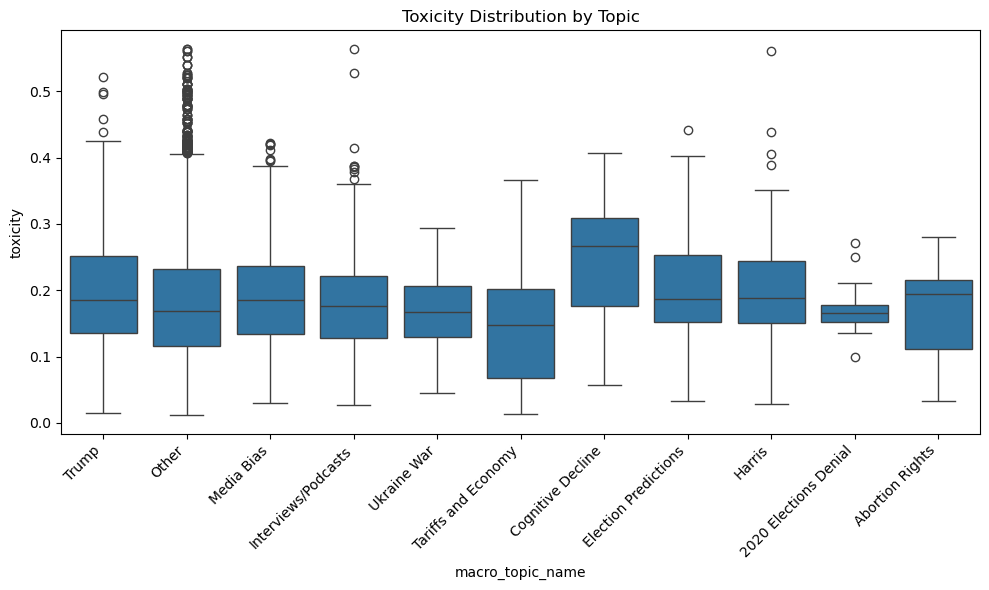

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="macro_topic_name", y="toxicity")
plt.xticks(rotation=45, ha="right")
plt.title("Toxicity Distribution by Topic")
plt.tight_layout()
plt.show()

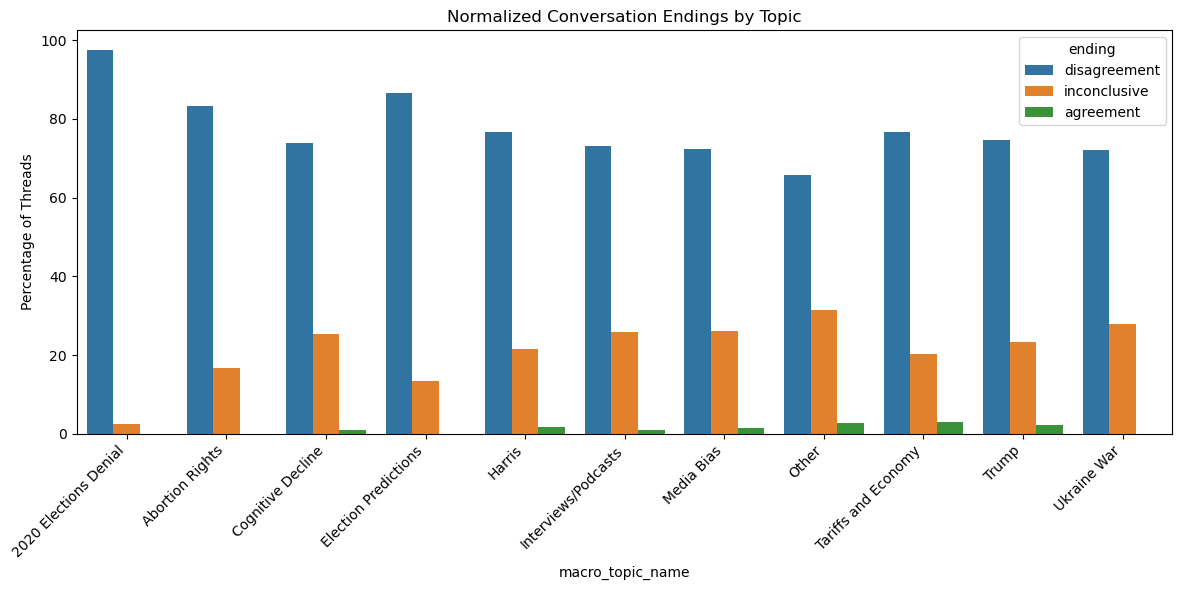

In [20]:
# Count total threads per topic + ending
counts = df.groupby(["macro_topic_name", "ending"]).size().reset_index(name="count")

# Normalize: compute % of each ending *within each topic*
total_per_topic = counts.groupby("macro_topic_name")["count"].transform("sum")
counts["percentage"] = counts["count"] / total_per_topic * 100

plt.figure(figsize=(12, 6))
sns.barplot(data=counts, x="macro_topic_name", y="percentage", hue="ending")

plt.xticks(rotation=45, ha="right")
plt.ylabel("Percentage of Threads")
plt.title("Normalized Conversation Endings by Topic")
plt.tight_layout()
plt.show()

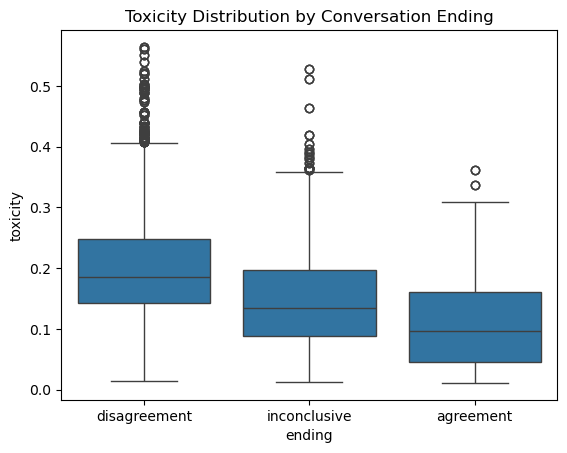

In [21]:
sns.boxplot(data=df, x="ending", y="toxicity")
plt.title("Toxicity Distribution by Conversation Ending")
plt.show()

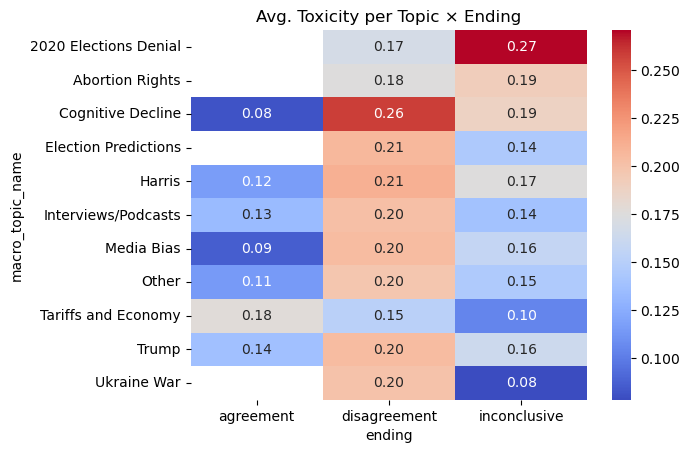

In [22]:
pivot = df.pivot_table(index="macro_topic_name", columns="ending", values="toxicity", aggfunc="mean")
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Avg. Toxicity per Topic × Ending")
plt.show()